# NLP Capstone - Financial Sentiment Analysis
- Author: Kyle Jensen
- Date: 12/11/22
- Contact: kylebeckjensen@gmail.com

# Introduction

Natural Language Processing (NLP) is a unique tool for identifying latent value in text. Within NLP, sentiment analysis is a technique that is used to determine the emotional tone behind a piece of text, including financial headlines. With the help of machine learning models, analyzing large amounts of financial text data and identify key features that are indicative of a particular sentiment have proven to be useful tools for either individual investors or larger institutional firms for myriad of reasons such as identifying trends and predicting market movements, improving risk management, improve overall decision making.

Here lies not only our business problem but also our solution. Instead of purely relying on the vast collection of financial documents such an income statements, P&L reports, balance sheets to identify trends and make predictions about the future direction of the market or even a holistic view on the financial vitality of individual companies. NLP can help financial organizations automate certain tasks, such as sentiment analysis of customer feedback or automated generation of reports based on financial news articles. This can save time and resources and allow analysts to focus on more complex tasks.This adds direct value to either individual investors or established financial institutions in a few ways such as better managing their risks by identifying potential market risks and helping them make more informed decisions about how to allocate their assets or improve decision-making by providing managers and executives with more accurate and timely information about market trends and risks.

The dataset is quite simple since it is comprised of only two columns. The first being `Sentence`, which is a corpus composed of financial news headlines in text format while the the second column `Sentiment` is the preassigned score of the headline. The score shows whether or not a particular headline possesses a positive, negative, or neautral emotional tone to it.

### Table of contents
Exploratory Data Analysis

Logistic Regression

Decision Trees

Boosting & Ensemble Methods

Conclusion & Findings

# Exploratory Data Analysis

The fist step in an any data science project is the Exploratory Data Analysis section. Here we will load in the appropriate software packages, load in the data set as a dataframe, become familiar with the dataset, clean the data, and finally, extract and display any useful insights vis-a-vis visualizations.

In [623]:
#import required packages 
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from scipy import sparse
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import cross_val_score
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [624]:
#Import Capstone financial data
data = pd.read_csv('Capstone financial data.csv')

In [625]:
#Make a copy of the data to safeguard against permanently making  unwanted changes on the original dataframe
df = data.copy()

In [626]:
#Examine the first 5 rows of data
df.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


At first glance, we see the data only contains two columns `Sentence` and `Sentiment`. `Sentence` contains a robust collection of financial headlines that corresponds to the `Sentiment` or tone of each headline along with the preassigned tone of either positive, negative, or neutral. 

In [456]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [474]:
#Examine the first line
df['Sentence'][0]

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [475]:
#See how many data points and features I'll be working with
print("There are", df.shape[0], 'data points, each with', df.shape[1], 'features.')

There are 5842 data points, each with 2 features.


In [476]:
#Check to see if the dataset contains any NaN's
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

Appears that the data does not contain any NaN's.

In [477]:
#Confirm the unique categories in the Sentiment column
df['Sentiment'].unique()

array([ 1, -1,  0])

Now that we've seen the columns and information that we will be analyzing, we can begin visualizing preliminary findings

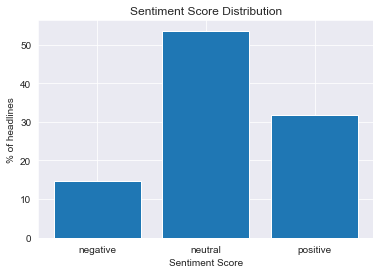

In [461]:
#Examine the distribution of Sentiment Scores
values, counts = np.unique(df['Sentiment'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100)
plt.xlabel('Sentiment Score')
plt.ylabel('% of headlines')
plt.title("Sentiment Score Distribution")
plt.show()

As we see from the graph above, more that 50%

In [716]:
#Map postive, neautral, and negative words to integers
map_scores = {'positive': 1, 'neutral': 0 , 'negative': -1}

df.Sentiment = df.Sentiment.map(map_scores)

Above, I mapped the sentiment values to certain scores so that I can easily vectorize and train the sentence column for modelling. 

In [464]:
#Confirm that Sentiment column has been mapped correctly 
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-1
2,"For the last quarter of 2010 , Componenta 's n...",1
3,According to the Finnish-Russian Chamber of Co...,0
4,The Swedish buyout firm has sold its remaining...,0


### Splitting Data into X and y train

X_train and y_train are commonly used names for the input and output training data in a machine learning model. "X" is typically used to represent the input data, and "y" is used to represent the output or target data. The "train" part of the name indicates that this data is used for training the model.

As with X_train and y_train, "X" is used to represent the input data and "y" is used to represent the output or target data. The "test" part of the name indicates that this data is used to evaluate the performance of the trained model on unseen data.

In [546]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop(columns='Sentiment',axis=1)
y = df['Sentiment']+1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)

**Note:** I added a +1 to my y-variable because because when I ran my XGBoost further down in the notebook, the model was expecting only positive values of 0 (neutral) 1 (negative), 2 (positive) instead of -1 for negative sentiment. 

In [660]:
# 0. For completeness sake - scale the data 
from sklearn.preprocessing import StandardScaler

# 1. Instantiate Standard Scaler
ss = StandardScaler()

# 2. Fit - on training set only and convert to array from the sparse matrix
ss.fit(X_train_transformed_sentence.toarray())

# 3. Transform - both train and test with fit scaler
X_train_ss = ss.transform(X_train_transformed_sentence.toarray())
X_test_ss = ss.transform(X_test_transformed_sentence.toarray())

Scaling data is important in machine learning because most algorithms use some form of distance metric to compare samples. If the features in the data have different scales, then some features will dominate the distance metric, and the model will be unable to learn properly.

The next step will be to filter out stop words, punctuation, stem words, etc.

In [408]:
# import the nltk stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kylejensen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After removing the stop words and punction, will need to employ CountVectorizer, fit model, and transform.

In [507]:
#Import stemmer
stemmer = nltk.stem.PorterStemmer()

#Bag of words vectorization for Positive_Review
bagofwords_sentence = CountVectorizer(min_df=20, 
                             tokenizer=my_tokenizer)
#Fit bag of words models
bagofwords_sentence.fit(X_train["Sentence"])
#bagofwords_sentence.fit(df["Sentence"])

#Transform
X_train_transformed_sentence = bagofwords_sentence.transform(X_train["Sentence"])
X_test_transformed_sentence = bagofwords_sentence.transform(X_test["Sentence"])
#sentence_transformed = bagofwords_sentence.transform(["Sentence"])
 
X_train_transformed_sentence.shape
X_test_transformed_sentence.shape
#sentence_transformed.shape

(1753, 486)

In [659]:
sentence_transformed

<1x675 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [658]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
my_dtm = pd.DataFrame(columns=bagofwords_sentence.get_feature_names(), data=X_train_transformed_sentence.toarray())
display(my_dtm)

,1,10,100,11,12,13,14,15,16,17,...,week,well,whole,work,world,worth,would,year,yearonyear,yit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [715]:
#Create varible for BoW feature names
feature_names = bagofwords_sentence.get_feature_names()

In [712]:
#Examine feature names
bagofwords_sentence.get_feature_names()

['1',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '22',
 '23',
 '25',
 '27',
 '29',
 '3',
 '30',
 '31',
 '35',
 '4',
 '40',
 '5',
 '50',
 '6',
 '7',
 '8',
 '9',
 'aapl',
 'ab',
 'accord',
 'account',
 'acquir',
 'acquisit',
 'activ',
 'ad',
 'addit',
 'adp',
 'ago',
 'agre',
 'agreement',
 'aim',
 'alreadi',
 'also',
 'america',
 'amount',
 'analyst',
 'announc',
 'annual',
 'applic',
 'approv',
 'approxim',
 'april',
 'area',
 'around',
 'asset',
 'astrazeneca',
 'august',
 'avail',
 'award',
 'back',
 'baltic',
 'bank',
 'barclay',
 'base',
 'begin',
 'bid',
 'billion',
 'board',
 'book',
 'brand',
 'break',
 'build',
 'busi',
 'buy',
 'call',
 'capac',
 'capit',
 'carri',
 'cash',
 'cent',
 'center',
 'central',
 'ceo',
 'chairman',
 'chang',
 'chart',
 'chief',
 'china',
 'citi',
 'close',
 'combin',
 'come',
 'commerci',
 'commun',
 'compani',
 'compar',
 'compet

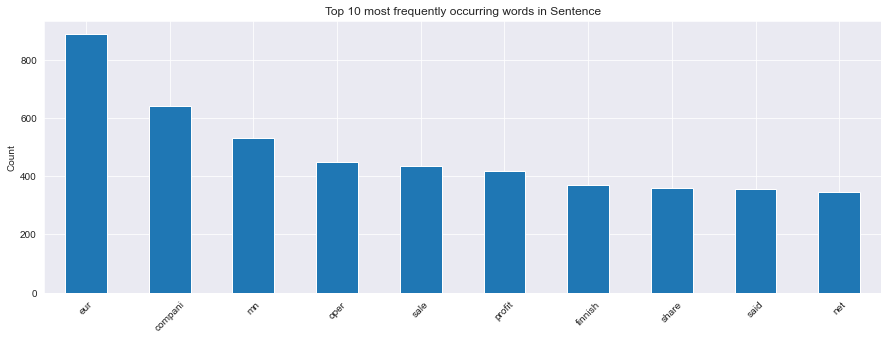

In [412]:
#Visualize the Top 10 most frequently occurring words in Sentence
word_counts = pd.DataFrame(
    {"counts": X_train_transformed_sentence.toarray().sum(axis=0)},
    index=bagofwords_sentence.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(10).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 10 most frequently occurring words in Sentence")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

From the graph above we can see the top 10 most frequently used words in our corpus. However, I'll need to examine the coefficients of each feature to see the weight of their individual importance. 

In [510]:
#Will need to install word cloud using pip install
pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-macosx_10_9_x86_64.whl (160 kB)
Note: you may need to restart the kernel to use updated packages.


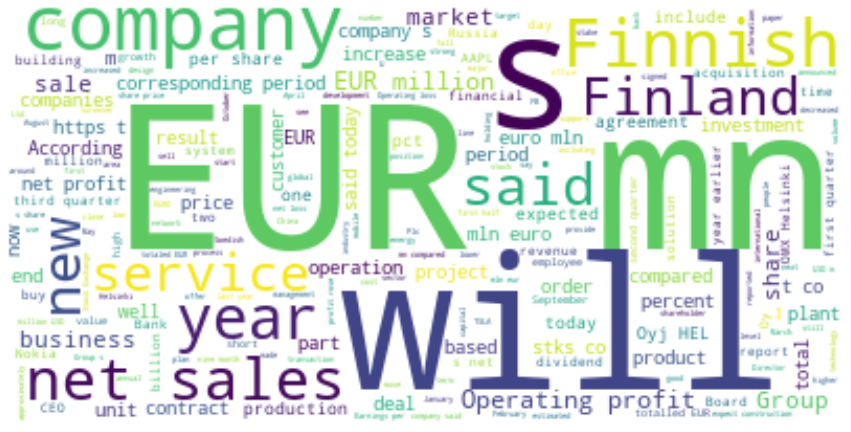

In [511]:
#Generate word cloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in df.Sentence)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see above a word cloud is a visual representation of the most common words in a given text. It is often used as a way to quickly and easily understand the key themes or ideas in a large amount of text.

# Supervised Learning Models

Supervised machine learning is a type of machine learning where the training data consists of labeled examples, and the goal is to train a model to make predictions on new data. In other words, the model is "supervised" during training by having the correct answers provided to it. For this project, we will explore two different kinds of supervised learning models. The first being Logistic Regression and the second being Decision Trees. 

## Logstic Regression

Logistic regression is a machine learning algorithm used for classification. It is a supervised learning algorithm, which means that it is trained on labeled data. The goal of logistic regression is to find the best model that describes the relationship between the dependent variable and one or more independent variables.

In [613]:
#import the necessary libraries for logistic regression below
from sklearn.linear_model import LogisticRegression

In [662]:
# Fitting a baseline model
logreg = LogisticRegression()
logreg.fit(X_train_ss, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_ss, y_train)}")
print(f"Test score: {logreg.score(X_test_ss, y_test)}")

Train score: 0.7571533382245048
Test score: 0.6320593268682259


As we can see from the output above, the **baseline Logistic Regression model is 63% accurate**. To further increase the test score, I will need to implement hyperparameter tuning after I investigate the importance of each feature below. 

In [615]:
#Will need to pull the coefficients from each sentiment value.
logreg.coef_

array([[-0.01604038, -0.07285281, -0.07644419, ..., -0.02358354,
        -0.00391755, -0.14735252],
       [ 0.04067056,  0.03546922, -0.01419782, ..., -0.10628665,
        -0.11439749, -0.03215965],
       [-0.02463018,  0.0373836 ,  0.09064201, ...,  0.12987018,
         0.11831504,  0.17951217]])

Since our data is normalized, meaning that the coefficients are a number between 0 and 1, we can properly sort the weights of each feature by most important to least important depending on the sentiment category. 

In [650]:
#Look at the coefficients with for negative sentiment
for feature_name, weight in sorted(zip(feature_names, logreg.coef_[0]), key = lambda x: -x[1]):
    print(feature_name + ": " + str(weight))

decreas: 0.39738190455615024
fell: 0.26877927839781907
scanfil: 0.2655797544055235
spi: 0.2372819884964375
personnel: 0.23199530633445514
fall: 0.22489672512665831
lower: 0.21734885305474322
drop: 0.21699108722749635
mn: 0.20976861769398267
short: 0.19669177010280645
baltic: 0.18959183736451318
remain: 0.1461216068180487
metal: 0.14253930708679982
liquid: 0.14002122487626142
25: 0.13730315164242096
previous: 0.13282087802159004
chang: 0.13055835519843745
hel: 0.12440087519710122
local: 0.12384158605123018
tsla: 0.12141859702358122
declin: 0.11365370034430913
initi: 0.11179740269498004
model: 0.111674299321431
loss: 0.11122926633799672
weak: 0.11102005343041059
russian: 0.11039107140146942
properti: 0.10917007493687306
two: 0.10474524345405618
omx: 0.10429625209925707
30: 0.10340600204639538
negoti: 0.10329958074047012
staff: 0.10300529225219571
peopl: 0.1005563398985815
inform: 0.10043095273691388
elcoteq: 0.10042841770828607
today: 0.09897571959332065
2009: 0.0975983727485823
competit

As we can see from the coefficients above, a few of the words with the most weight associated with negative sentiment are: **Decreas, fell, fall, lower, drop, and short**. While those words may seem intuitive, the coefficients reveal that other words that may also be indicative in predicting negative setiment such as: **scanfil, spi, personnel, mn, baltic, and remain**.

In [617]:
#Look at the coefficients with for positive sentiment
for feature_name, weight in sorted(zip(feature_names, logreg.coef_[2]), key = lambda x: -x[1]):
    print(feature_name + ": " + str(weight))

increas: 0.4687057635210767
rose: 0.32075327670477166
grew: 0.2893307380784224
long: 0.28102252019794305
improv: 0.28070259886014803
strong: 0.25957105596831054
line: 0.25657512601548704
posit: 0.2496889400909049
expand: 0.24025228112080435
call: 0.2382145740919855
upgrad: 0.23178987270525062
adp: 0.21797088051269467
sign: 0.2179239629798775
cooper: 0.21711481296932345
buy: 0.20821842554682127
19: 0.19460408217131642
break: 0.19291667337200508
divis: 0.18411832297977251
structur: 0.1834618381655096
agreement: 0.1828897693252488
yit: 0.17951217330012598
locat: 0.17715673399520984
order: 0.17532987367661884
acquir: 0.17454425986276925
name: 0.1647520355646272
higher: 0.16459533485767183
joint: 0.16405308075367492
eur: 0.16179191790810948
world: 0.16024394774547598
rise: 0.15980567154545686
largest: 0.15802896030162736
servic: 0.15705176057576556
approv: 0.15629462872741573
list: 0.15410012757600458
mainten: 0.15140687262112437
enabl: 0.14917779846465326
offer: 0.14816353103113755
jump: 0

As we can see from the coefficients above, a few of the words with the most weight associated  with positive sentiment are: **Increas, rose, grew, improv, posit, expand**. While those words may seem intuitive, the coefficients reveal that other words that may also be indicative in predicting positive setiment such as: **line, cooper, call, mn, break, and structur**.

In [651]:
#Look at the coefficients with for neutral sentiment
for feature_name, weight in sorted(zip(feature_names, logreg.coef_[1]), key = lambda x: -x[1]):
    print(feature_name + ": " + str(weight))

facil: 0.28143375481629
includ: 0.24401238512135562
headquart: 0.2334108175275126
publish: 0.22726886499720803
approxim: 0.22207422655080403
oy: 0.22060369509255737
avail: 0.2137658191560801
research: 0.20314717624493805
valu: 0.20307574566872377
acquir: 0.20254314103965146
establish: 0.19952546272429297
mainten: 0.19760751783626265
line: 0.19703256885675344
board: 0.19523262803510225
decreas: 0.18396878504182113
europ: 0.18234670138018705
transfer: 0.1796009015647443
personnel: 0.17496759724608296
disclos: 0.174491072880807
global: 0.1742313591859579
locat: 0.17253565404062135
deliv: 0.16480410379892596
subscrib: 0.1571847467573668
firm: 0.15647990967172834
electr: 0.15298612681590226
list: 0.1522606233226696
subscript: 0.15037646609203464
instal: 0.14883669093164334
divis: 0.14825063200959357
distribut: 0.14750491372537747
largest: 0.14742146177231705
schedul: 0.1471558379481535
approv: 0.14494353376897487
scanfil: 0.14441567483214812
sharehold: 0.14404649737041358
fell: 0.1391245505

While examining the coefficeints related to each sentiment is useful, it can present the issue of interpretability. 

### Confusion Matrix

A confusion matrix is a table that is commonly used in NLP to evaluate the performance of a model on a classification task. The matrix shows the number of true positive, false positive, true negative, and false negative predictions made by the model, allowing NLP practitioners to quickly evaluate the model's performance and identify any areas where it may be underperforming.

In [618]:
#import confusion matrix from sklearn learn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

As we can see from the baseline model above the **baseline Logistic Regression model is 65% accurate**, which is less than ideal. To further increase the test score, I will need to implement hyperparameter tuning below. 

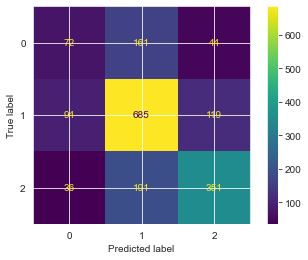

In [619]:
#Display Confusion Matrix
predictions = logreg.predict(X_test_ss)
cm = confusion_matrix(y_test, predictions, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=logreg.classes_)
disp.plot()

plt.show()

From the Confusion Matrix above, we are to understand the accruacy in which our models properly classified sentiment of financial headlines. As a brief reminder, I had to add a +1 to my y-variable in order to appropriately fit my boosting models further down in notebook since the model was expecting only positive values of 0 (negative) 1 (neutral), 2 (positive) instead of -1 for negative sentiment.

At first glance we see that neutral sentiment was properly classified 685 times. This assertion makes logical sense since our data naturally suffers from a heavy class imbalance where the neutral sentiment accounts for a large majority of the data. If you read at the matrix diagonally, you can see that 0 (negative sentiment) correctly classified 72 variables, 1 (neutral sentiment) classified correctly 685 variables, and 2 (positive sentiment)  correctly classified 351 variables. 

### GridSearch and Hyperparamter Tuning - Logistic Regression

One of the main uses of grid search in machine learning is to find the optimal hyperparameters for a model. By using grid search, we can avoid the time-consuming and error-prone process of manually trying different hyperparameter values, and can instead automatically find the combination that gives the best performance.

In [631]:
#import the neccessary libraries to run GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [655]:
# Parameter "Grid search" without a pipeline
param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

gs_logreg = GridSearchCV(LogisticRegression(), param_grid=param_grid_log)

gs_logreg.fit(X_train_ss, y_train)

gs_logreg.score(X_test_ss, y_test)

0.6583000570450656

In [656]:
gs_logreg.best_estimator_

LogisticRegression(C=0.001)

After introducing the optimized parameter for "C", our test score has **increased from 63% to 65%**.

In [654]:
# Create the pipeline

estimators = [('reducer', PCA()),
            ('scaler', StandardScaler()),
             ('model', LogisticRegression()),]

pipeline = Pipeline(estimators)

pipeline

Pipeline(steps=[('reducer', PCA()), ('scaler', StandardScaler()),
                ('model', LogisticRegression())])

In [713]:
# "Grid search" without a pipeline
param_grid_all = [{'reducer':[None],
                'scaler': [None, StandardScaler()],
                'model': [LogisticRegression()],
                'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'model__penalty': ["l1", "l2"]},
              {'reducer': [PCA()],
                'reducer__n_components': np.arange(1, 10),
                'scaler': [None, StandardScaler()],
                'model': [LogisticRegression()],
                'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'model__penalty': ["l1", "l2"]},
            
               ]

gs_all = GridSearchCV(pipeline, param_grid=param_grid_all, n_jobs=-1, verbose=1)

gs_all.fit(X_train_ss, y_train)

gs_all.score(X_test_ss, y_test)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_b215fc967b074574bbb75793b20ed979/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

0.6583000570450656

In [652]:
gs_all.best_estimator_

Pipeline(steps=[('reducer', None), ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.001))])

From the pipeline above, we can see the results of the pipeline of logistic regression with the best parameters.

### Decision Tree

Now that we've deployed a Logistic Regression model, which yielded 65%  accuracy after tuning, we will deploy a Decision Tree to see if that yields better results. But before we do, let's understand what a Decision Tree is at a high level. 

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In the context of Python, a decision tree model refers to a model created using the decision tree algorithm. The decision tree algorithm is a supervised learning algorithm that is commonly used for classification and regression tasks. It works by creating a tree-like structure, where each internal (non-leaf) node represents a test on an attribute, each branch represents the outcome of the test, and each leaf (or terminal) node represents a class label.

In [606]:
#Examine the shape of X_train
X_train_transformed_sentence.shape

(4089, 486)

In [607]:
#Confirm length of the X_train_ss matches X_train_transformed_sentence
len(X_train_ss)

4089

Since the length of both the X_train_ss and X_train_transformed_sentence have equal lengths now, we can proceed with instantiating a Decision Tree model. Will I will use a max_depth of one for baseline DT model then tune hyperparameters from there.

In [608]:
#First, import the DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

In [609]:
# 1. Instantiate basic Decision Tree Classifier with max_depth=1
my_tree = DecisionTreeClassifier(max_depth=1)

# 2. Fit the model on the training data
my_tree.fit(X_train_ss, y_train)

# 3. Score - on both train and test
print(f"Decision Tree Scores:")
print(f"X_train_ss:",my_tree.score(X_train_ss, y_train))
print(f"X_test_ss:", my_tree.score(X_test_ss, y_test))

Decision Tree Scores:
X_train_ss: 0.5654194179505991
X_test_ss: 0.5316600114090131


Regarding the cell above, we used a max_depth=1 so that the DT does not grow unbounded and also to establish a **baseline model accuracy of 53%**. Given the low score of the baseline model, we will continue forward and utilize GridSearch to find the optimal max_depth and min_sample_leaf to see if we can further improve the accuracy of the Decision Tree model.

### GridSearch and Hyperparamter Tuning - Decision Tree

One of the main uses of grid search in machine learning is to find the optimal hyperparameters for a model. By using grid search, we can avoid the time-consuming and error-prone process of manually trying different hyperparameter values, and can instead automatically find the combination that gives the best performance.

In [705]:
#Import GridSeachCV, which will aid in finding the optimal max_depth and min_samples_leaf
from sklearn.model_selection import GridSearchCV

In [706]:
# Parameter grid
param_grid = {'max_depth': [None, 1, 4, 16, 32, 48, 64], 'min_samples_leaf': [1, 2, 4, 8, 12, 16]}

In [707]:
# Instantiate the log reg grid search
decisionTree_gs = GridSearchCV(my_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the log reg grid search
fitted_decisionTree_gs = decisionTree_gs.fit(X_train_ss, y_train)

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 

  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

/Users/kylejensen/.local/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 ...
 [-0.12278923 -0.1251533  -0.08597083 ... -0.24718863 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]
 [-0.12278923 -0.1251533  -0.08597083 ...  3.73215905 -0.08020125
  -0.06608602]] loaded from the file /var/folders/mb/6dvmbwrj6tv0r5fh9lg7n9wh0000gn/T/joblib_memmapping_folder_92438_ae01fd8f2e234926aafeedf3fef8a39c_1a3f9eae48c94d9d9c2d28cec9ac1dc1/92438-140572485317920-3876e15b1d0d4ec0b94965bc4699219d.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regener

In [708]:
print(fitted_decisionTree_gs.score(X_train_ss, y_train))
print(fitted_decisionTree_gs.score(X_test_ss, y_test))

0.6960136952800196
0.648031945236737


In [709]:
print(f"Best estimators for Decision Tree:")
print(fitted_decisionTree_gs.best_estimator_)

Best estimators for Decision Tree:
DecisionTreeClassifier(max_depth=32, min_samples_leaf=8)


After deploying a GridSearch to find the optimal hyperparameters with max_depth of 32 and min_samples_leaf of 8, **we clearly see an improvement in accuracy from 53% using our baseline model to now 64%.** In the current state our Decision Tree model is not showing promising results in having a greater accuracy from the Logistic Regression model. However, these results could still be improved using a variety of ensemble and boosting methods which we will explore below.

### Visualize feature importance 

Similar to using the coefficient weight in Logistic Regression to find important features, we can rely on the feature_importance_ attribute to accomplish the same the task for Decistion Tree models, which we will explore below. 

In [535]:
from sklearn import tree

In [527]:
#Create a new variable to pass into the tree plot
fitted_decisionTree_best = fitted_decisionTree_gs.best_estimator_

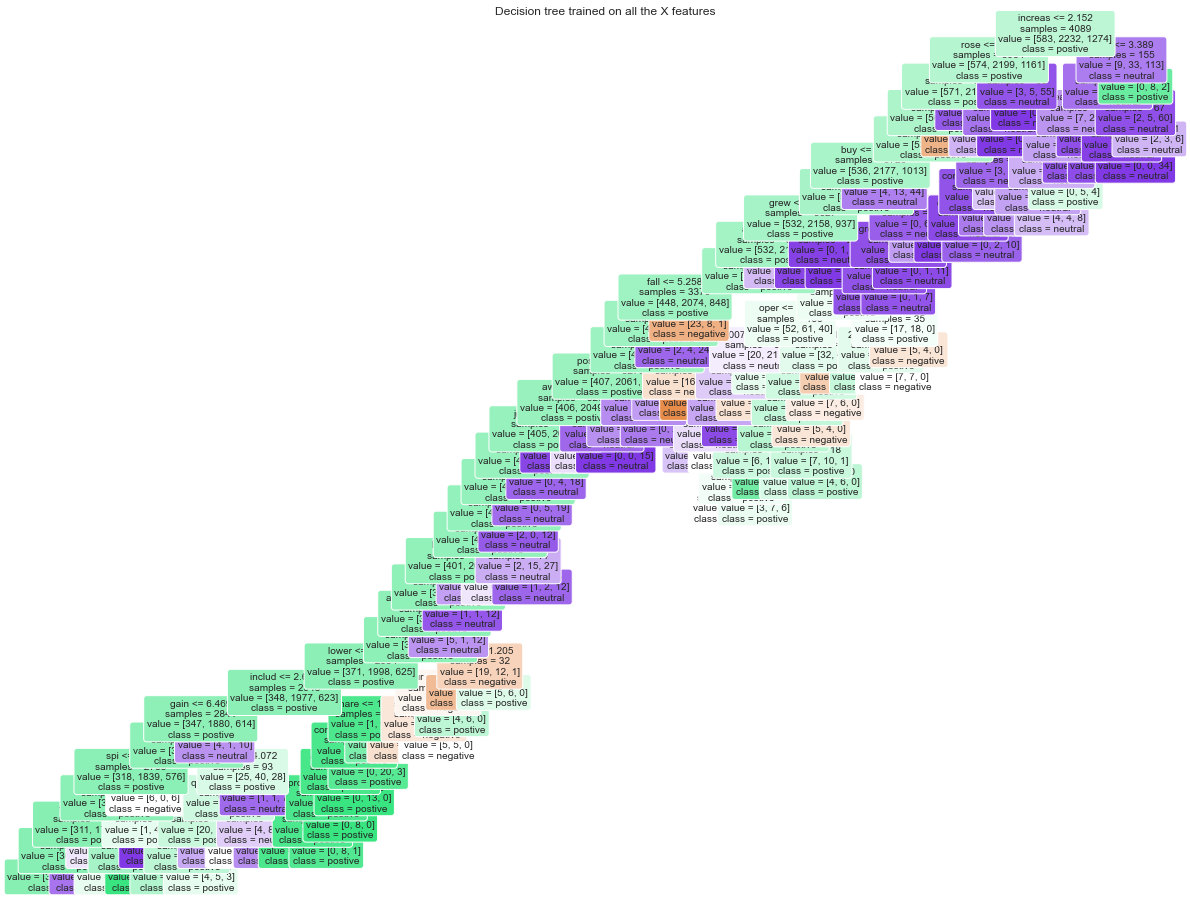

In [665]:
#Visualize the tree plot
plt.figure(figsize=(20,16))# set plot size (denoted in inches)
tree.plot_tree(fitted_decisionTree_best,fontsize=10,feature_names=feature_names,class_names=["negative", "postive", "neutral"],filled=True,rounded=True,
          impurity=False,)
plt.title("Decision tree trained on all the X features")
plt.show()

In [685]:
#Sanity check that

print(fitted_decisionTree_best.feature_importances_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.61972880e-03 5.29509627e-03 2.40920491e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.98710020e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.81683698e-05
 0.00000000e+00 0.00000000e+00 1.93910937e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [710]:
#Look at the most important features of positive sentiment
for feature_name, importance in sorted(zip(feature_names, fitted_decisionTree_best.feature_importances_), key = lambda x: -x[1]):
    print(feature_name + ": " + str(importance))
        

increas: 0.08007026400681568
rose: 0.0624541831454201
long: 0.05317097963427718
short: 0.037886702664794256
improv: 0.03691305151707592
buy: 0.036474452250661836
sign: 0.035384581984588714
grew: 0.035180179215570664
aapl: 0.02987100204813778
fall: 0.028857000515771843
mn: 0.028588360106121376
higher: 0.027688050011360425
tsla: 0.027542451075155933
posit: 0.02482907103131509
award: 0.023276384545112407
jump: 0.022873241168573404
rise: 0.021435369424499234
expand: 0.02138236772438768
break: 0.019542315230350445
growth: 0.019352313394006927
astrazeneca: 0.0183803988156227
upgrad: 0.018244531835824918
look: 0.018208520845461696
drop: 0.018182035928468596
lower: 0.016936665098498803
finnish: 0.016433593306126194
loss: 0.01621886187501431
includ: 0.015794570690000308
gain: 0.014820899324519219
spi: 0.014011079338310873
tesco: 0.013310321424216653
order: 0.01317273920976303
sale: 0.012363150482036254
strong: 0.012039922855426112
capit: 0.011414008873249622
valu: 0.008980500247133545
2007: 0.0

As we can see from the coefficients above, a few of the words with the most weight associated  with positive sentiment are: **Increas, rose, grew, improv, posit, expand**. While those words may seem intuitive, the coefficients reveal that other words that may also be indicative in predicting positive setiment such as: **sign, fall, short, drop, and lower**.

### Boosting & Ensemble Methods

Boosting is a machine learning technique that is used to improve the performance of a model by combining the predictions of multiple weaker models. For our purposes, boosting methods can be used to improve the performance of models that are used for tasks such as text classification and sentiment analysis with boosting methods such as XGBoost and AdaBoost. We will also apply a basic ensemble method of Random Forest as well. 

In [433]:
#In order to properly install xgboost please run the line of code below
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [434]:
#Import the appropriate classifiers
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [601]:
#Use XGboost, AdaBoost, and ensemble learning methods
XGB_model = XGBClassifier()
AB_model = AdaBoostClassifier()
RF_model = RandomForestClassifier()

#Fit the models on the trained data
AB_model.fit(X_train_ss, y_train)
RF_model.fit(X_train_ss, y_train)
XGB_model.fit(X_train_ss, y_train)

#Print test scores
print("Test Set Scores:")
print(f"AdaBoost score: {AB_model.score(X_test_ss, y_test)}")
print(f"Random Forest score: {RF_model.score(X_test_ss, y_test)}")
print(f"XG Boost score: {XGB_model.score(X_test_ss, y_test)}")

Test Set Scores:
AdaBoost score: 0.6428978893325727
Random Forest score: 0.6223616657159156
XG Boost score: 0.6440387906446092


From the boosting results above, we can see even when introducing boosting there's no improvement in our models performance and in the case of the Random Forest our test accuracy score actually decreased to 62%.

### Comparing Results:

Below we can see a summary of all of the models used:

In [700]:
print(f"--Summarized Model Score Results--")
print(f"Logistic Regression with tuning: {gs_logreg.score(X_test_ss, y_test)}")
print(f"Logistic Regreesion w/o tuning: {logreg.score(X_test_ss, y_test)}")
print(f"Decision Tree with tuning:{fitted_decisionTree_gs.score(X_test_ss, y_test)}")
print(f"Decision Tree w/o tuning:", my_tree.score(X_test_ss, y_test))
print(f"AdaBoost score: {AB_model.score(X_test_ss, y_test)}")
print(f"XG Boost score: {XGB_model.score(X_test_ss, y_test)}")
print(f"Random Forest score: {RF_model.score(X_test_ss, y_test)}")

--Summarized Model Score Results--
Logistic Regression with tuning: 0.6583000570450656
Logistic Regreesion w/o tuning: 0.6320593268682259
Decision Tree with tuning:0.648031945236737
Decision Tree w/o tuning: 0.5316600114090131
AdaBoost score: 0.6428978893325727
XG Boost score: 0.6440387906446092
Random Forest score: 0.6223616657159156


Above, we can see that the model with best performance was the logistic regress after hyperparameter tuning. 

## Conlusion and Findings

Natural Language Processing is a higly effective tool for identifying latent value in text and sentiment analysis is a natural language processing technique that is used to determine the emotional tone behind a piece of text.Sentiment analysis typically involves using machine learning algorithms to process large amounts of text data and identify key features that are indicative of a particular sentiment. These algorithms can then be used to automatically classify new text data into the appropriate sentiment category, especially in this case of multiclass classification. With the onset of the digital age, this can be extremely beneficial to either small investors or prominient financial instituions for a myriad of reasons such as identifying trends and predicting market movements, improving risk management, predicting future company performance or improve overall decision making instead of purely relying on financial statements.

In regard to the supervised machine learning modelling results, after fitting a baseline logistic regression model on the data, the test score was approximately 63%. In order to further increase the test score, I implemented hyperparameter tuning with GridSearch to find the optimal values for C. Once I found the optimal C parameter, I fit the regression on the scaled X_train data, which actually increased the test accuracy score to 65%, which happened to be the best performing model for predicting sentiment values. 

At first glance of the confusion matrix, we saw that neutral sentiment was properly classified 685 times. This assertion makes logical sense since our data naturally suffers from a heavy class imbalance where the neutral sentiment accounts for a large majority of the data. If you read at the matrix diagonally, you can see that 0 (negative sentiment) was correctly classified 72 times, 1 (neutral sentiment) was classified correctly 685 times, and 2 (positive sentiment) was correctly classified 351 times. 

While looking at the weights of the feature coefficients for logistic regression and decision trees, we found that a few of the words with the most weight associated with negative sentiment are: Decreas, fell, fall, lower, drop, and short. While the words with the most weight associated with positive sentiment are: Increas, rose, grew, improv, posit, expand.

For the second supervised machine learning, Decision Trees, the baseline model resulted in a 64% test accuracy score. After introducing GridSearch for the find the optimal hyperparameters for the max_depth of 32 and min_leaf_samples of 8, the test scores did not yield any difference from the baseline Decision Tree model. Nonetheless, it was necessary to introduce boosting methods such as XGBoost and AdaBoost to try to further improve the model’s performance. Yet again, the performance for the fitted models using boosting methods did not increase above the 64% baseline. Incorporating the ensemble method, Random Forest, actually decreased the performance to 62%. 

Overall, predicting neutral tone in natural language text can be a challenging task for NLP systems, due to its subjectivity and the many different ways in which it can be expressed. This can make it challenging for NLP systems to accurately identify neutral tone, as they may not be able to accurately recognize all of the different ways in which it can be expressed. As we previously discussed in the report above, there was unfortunately a large class imbalance regarding the sentiment with the neutral class accounting for more than 50% of the data. 

Addtionally, I found that there was little distinction in model performance between Logistic Regression and Decision Trees. Only when I introduced the optimal hyperparamters for Logistic Regression, did I find my best performing test accuracy score of 65%. 